1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that they are two procedure yields to same result
* What percent of the total variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline
%precision 4

'%.4f'

Shape of dataset:  (3, 1000)
Shape of cov matrix:  (3, 3)

COV
Eigenvalues:  [2.6182e+01+0.j 1.0583e-15+0.j 1.9602e+00+0.j]
Eigenvectors:  [[-0.1167 -0.8165  0.5654]
 [-0.5758 -0.4082 -0.7084]
 [-0.8092  0.4082  0.4224]] 

SVD
Eigenvalues:  [2.6182e+01 1.9607e+00 5.1911e-32]
Eigenvectors:  [[-0.1167  0.5654 -0.8165]
 [-0.5758 -0.7084 -0.4082]
 [-0.8092  0.4225  0.4082]] 

Trace cov mat: 28.141908799763996
Trace lambda:  28.141908799764003
Percentage:    0.930345308809356
Percent. Red:  0.9999999999999999


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: ComplexWarning: Casting complex values to real discards the imaginary part


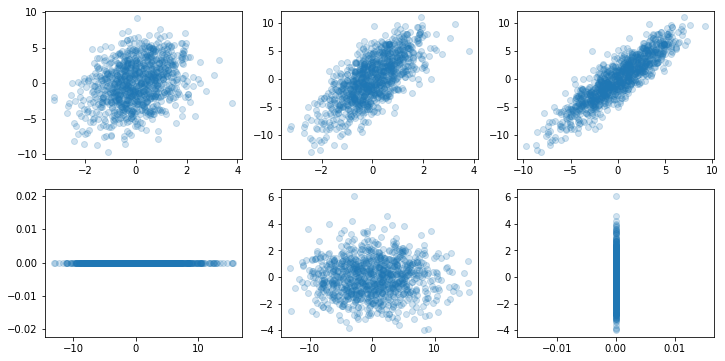

In [2]:
N = 1000
x1 = np.random.normal(0,1,N)
x2 = x1 + np.random.normal(0,3,N)
x3 = 2*x1 + x2

ds = np.array([x1,x2,x3])
print("Shape of dataset: ",ds.shape)
# note: real dataset is transposed (3 columns, N rows)

# eigenvectors and eigenvalues via cov matrix
dsCov = np.cov(ds)
print("Shape of cov matrix: ",dsCov.shape)
valCov,vecCov = la.eig(dsCov)
print("\nCOV\nEigenvalues: ",valCov)
print("Eigenvectors: ",vecCov,"\n")

# eigenvectors and eigenvalues via SVD
U,spc,Vt = la.svd(ds)
valSvd = spc**2/(N-1)
vecSvd = U
print("SVD\nEigenvalues: ",valSvd)
print("Eigenvectors: ",vecSvd,"\n")

# variability percentage
Lambda = np.diag(valCov)
print ("Trace cov mat:", dsCov.trace())
print ("Trace lambda: ", float(Lambda.trace()))
print ("Percentage:   ", float(Lambda[0,0]/Lambda.trace()))

# reduction = remove
valCovRed = valCov.copy()[:-1]
LambdaRed = np.diag(valCovRed)
print ("Percent. Red: ", float(LambdaRed[0,0]/LambdaRed.trace()))

# rotation
newDs = np.dot(vecCov.T,ds)
newX1 = newDs[0,:]
newX2 = newDs[1,:]
newX3 = newDs[2,:]

# plots
fig,plots = plt.subplots(nrows=2, ncols=3, figsize=(12,6))
plots[0,0].scatter(x1, x2, alpha=0.2)
plots[1,0].scatter(newX1, newX2, alpha=0.2)

plots[0,1].scatter(x1, x3, alpha=0.2)
plots[1,1].scatter(newX1, newX3, alpha=0.2)

plots[0,2].scatter(x2, x3, alpha=0.2)
plots[1,2].scatter(newX2, newX3, alpha=0.2);

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

**Answer:** In the previous case, removing the third dataset (the one that is dependent from the other) led to perfect reduction (that is, variability percent = 100%) while in this case removing noise and third dataset does not lead to a perfect reduction. Basically as data contains noise that alters the shape, less components are needed to represent the full dataset: taking only the first component results in variability = 100%, and taking the first two does not lead to a huge improvement over the full dataset's percentage.

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: ComplexWarning: Casting complex values to real discards the imaginary part


Percentage:   0.9302153523863208
Perc. Red 3:  0.9303452277134112
Perc. Red 2:  0.9303452277134112
Perc. Red 1:  1.0


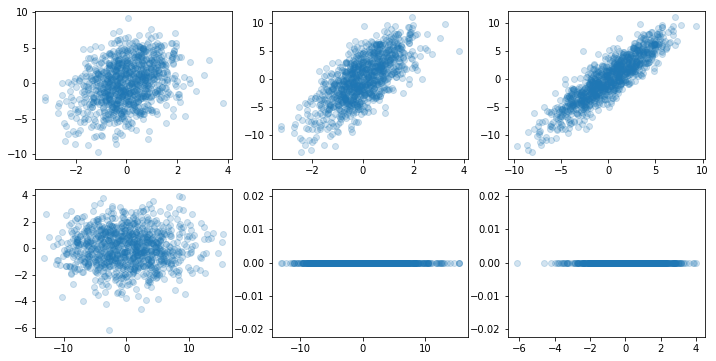

In [3]:
# new dataset: old data plus noise
ds = np.zeros((13,N))
ds[0] = x1
ds[1] = x2
ds[2] = x3
for i in range(3,13):
    mean = 0    #np.random.uniform(-5,5)
    std  = 1/50 #1/np.random.uniform(1,50)
    ds[i] = np.random.normal(mean,std,N)

# same analysis as before
# eigenvectors and eigenvalues via cov matrix
dsCov = np.cov(ds)
valCov,vecCov = la.eig(dsCov)

# skip displaying too verbose data
#print("Shape of cov matrix: ",dsCov.shape)
#print("\nCOV\nEigenvalues: ",valCov)
#print("Eigenvectors: ",vecCov,"\n")

# variability percentage
Lambda = np.diag(valCov)
#print ("Trace cov mat:", dsCov.trace())
#print ("Trace lambda: ", float(Lambda.trace()))
print ("Percentage:  ", float(Lambda[0,0]/Lambda.trace()))

# reduction = remove last columns (noise)
valCovRed = valCov.copy()[:3]
LambdaRed = np.diag(valCovRed)
print ("Perc. Red 3: ", float(LambdaRed[0,0]/LambdaRed.trace()))

# reduction = remove last columns (noise plus x3)
valCovRed = valCov.copy()[:2]
LambdaRed = np.diag(valCovRed)
print ("Perc. Red 2: ", float(LambdaRed[0,0]/LambdaRed.trace()))

# reduction = remove last columns (noise plus x2,x3)
valCovRed = valCov.copy()[:1]
LambdaRed = np.diag(valCovRed)
print ("Perc. Red 1: ", float(LambdaRed[0,0]/LambdaRed.trace()))

# rotation
newDs = np.dot(vecCov.T,ds)
newX1 = newDs[0,:]
newX2 = newDs[1,:]
newX3 = newDs[2,:]

# plots
fig,plots = plt.subplots(nrows=2, ncols=3, figsize=(12,6))
plots[0,0].scatter(x1, x2, alpha=0.2)
plots[1,0].scatter(newX1, newX2, alpha=0.2)

plots[0,1].scatter(x1, x3, alpha=0.2)
plots[1,1].scatter(newX1, newX3, alpha=0.2)

plots[0,2].scatter(x2, x3, alpha=0.2)
plots[1,2].scatter(newX2, newX3, alpha=0.2);

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset